In [1]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

In [2]:
import dask.dataframe as dd
# import pandas as pd
# import numpy as np
import os
from glob import glob

In [8]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()
df.head()

Price,ticker,Date,Adj Close,Close,High,Low,Open,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
0,HUM,2000-01-03 00:00:00+00:00,6.752522,7.5625,8.375,7.3750,8.3125,1287300,Health Care,Managed Health Care,2000,103.220001,-0.926734,0,1.0
1,HUM,2000-01-04 00:00:00+00:00,6.808329,7.6250,7.875,7.3750,7.3750,1238300,Health Care,Managed Health Care,2000,7.562500,0.008264,1,1.0
2,HUM,2000-01-05 00:00:00+00:00,6.975748,7.8125,7.875,7.5000,7.5000,1096300,Health Care,Managed Health Care,2000,7.625000,0.024590,1,1.0
3,HUM,2000-01-06 00:00:00+00:00,7.254777,8.1250,8.250,7.5000,7.7500,1026700,Health Care,Managed Health Care,2000,7.812500,0.040000,1,1.0
4,HUM,2000-01-07 00:00:00+00:00,7.812839,8.7500,9.125,8.0625,8.1875,2419300,Health Care,Managed Health Care,2000,8.125000,0.076923,1,0.0


In [6]:
ft_glob = glob(ft_dir+'/*.parquet')
ft_glob

['../../05_src/data/features/stock_features.parquet\\part.0.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.1.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.10.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.100.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.101.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.102.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.103.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.104.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.105.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.106.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.107.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.108.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.109.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.11.parquet'

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [11]:
df.sample(n = 5)

Price,ticker,Date,Adj Close,Close,High,Low,Open,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
90722,TEL,2023-10-09 00:00:00+00:00,120.995247,123.099998,123.489998,121.610001,122.709999,868700,Information Technology,Electronic Manufacturing Services,2023,123.970001,-0.007018,0,1.0
2263652,GM,2020-07-17 00:00:00+00:00,25.842165,26.450001,27.000000,26.250000,26.990000,8116100,Consumer Discretionary,Automobile Manufacturers,2020,26.850000,-0.014898,0,0.0
1014474,SNPS,2006-07-19 00:00:00+00:00,17.610001,17.610001,17.719999,17.370001,17.400000,887600,Information Technology,Application Software,2006,17.440001,0.009748,1,0.0
952116,KMB,2023-04-13 00:00:00+00:00,130.120758,137.460007,137.759995,135.710007,136.020004,1527100,Consumer Staples,Household Products,2023,136.729996,0.005339,1,0.0
553439,CNC,2009-10-16 00:00:00+00:00,4.557500,4.557500,4.660000,4.515000,4.605000,1288400,Health Care,Managed Health Care,2009,4.617500,-0.012994,0,1.0


In [15]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [12]:
df['ticker']

0           HUM
1           HUM
2           HUM
3           HUM
4           HUM
           ... 
2778194    JNPR
2778195    JNPR
2778196    JNPR
2778197    JNPR
2778198    JNPR
Name: ticker, Length: 2778199, dtype: string

In [17]:
idx = df['ticker'].isin(select_tickers)  # to check if  df['tickker contains ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR'] are in 
idx

0          False
1          False
2          False
3          False
4          False
           ...  
2778194    False
2778195    False
2778196    False
2778197    False
2778198    False
Name: ticker, Length: 2778199, dtype: bool

In [19]:
sum(idx) # the number of tickers of ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

55064

In [20]:
df[idx] # that contains ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

Price,ticker,Date,Adj Close,Close,High,Low,Open,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
490783,CBRE,2004-06-10 00:00:00+00:00,6.116667,6.116667,6.336667,6.033333,6.333333,35097600,Real Estate,Real Estate Services,2004,43.310001,-0.858770,0,0.0
490784,CBRE,2004-06-14 00:00:00+00:00,6.066667,6.066667,6.126667,6.053333,6.083333,2313600,Real Estate,Real Estate Services,2004,6.116667,-0.008174,0,1.0
490785,CBRE,2004-06-15 00:00:00+00:00,6.250000,6.250000,6.250000,6.070000,6.070000,2499600,Real Estate,Real Estate Services,2004,6.066667,0.030220,1,1.0
490786,CBRE,2004-06-16 00:00:00+00:00,6.333333,6.333333,6.366667,6.250000,6.250000,2810100,Real Estate,Real Estate Services,2004,6.250000,0.013333,1,1.0
490787,CBRE,2004-06-17 00:00:00+00:00,6.350000,6.350000,6.366667,6.266667,6.353333,1390200,Real Estate,Real Estate Services,2004,6.333333,0.002632,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703303,PCG,2024-10-17 00:00:00+00:00,20.280001,20.280001,20.610001,20.160000,20.590000,9375000,Utilities,Multi-Utilities,2024,20.510000,-0.011214,0,1.0
2703304,PCG,2024-10-18 00:00:00+00:00,20.379999,20.379999,20.389999,20.170000,20.340000,6607100,Utilities,Multi-Utilities,2024,20.280001,0.004931,1,0.0
2703305,PCG,2024-10-21 00:00:00+00:00,20.350000,20.350000,20.650000,20.280001,20.480000,9272500,Utilities,Multi-Utilities,2024,20.379999,-0.001472,0,1.0
2703306,PCG,2024-10-22 00:00:00+00:00,20.570000,20.570000,20.670000,20.240000,20.260000,7721300,Utilities,Multi-Utilities,2024,20.350000,0.010811,1,1.0


In [29]:
df[~idx] # that does not contain ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

Price,ticker,Date,Adj Close,Close,High,Low,Open,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
0,HUM,2000-01-03 00:00:00+00:00,6.752522,7.562500,8.375000,7.375000,8.312500,1287300,Health Care,Managed Health Care,2000,103.220001,-0.926734,0,1.0
1,HUM,2000-01-04 00:00:00+00:00,6.808329,7.625000,7.875000,7.375000,7.375000,1238300,Health Care,Managed Health Care,2000,7.562500,0.008264,1,1.0
2,HUM,2000-01-05 00:00:00+00:00,6.975748,7.812500,7.875000,7.500000,7.500000,1096300,Health Care,Managed Health Care,2000,7.625000,0.024590,1,1.0
3,HUM,2000-01-06 00:00:00+00:00,7.254777,8.125000,8.250000,7.500000,7.750000,1026700,Health Care,Managed Health Care,2000,7.812500,0.040000,1,1.0
4,HUM,2000-01-07 00:00:00+00:00,7.812839,8.750000,9.125000,8.062500,8.187500,2419300,Health Care,Managed Health Care,2000,8.125000,0.076923,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778194,JNPR,2024-10-17 00:00:00+00:00,39.220001,39.220001,39.250000,39.040001,39.189999,2221100,Information Technology,Communications Equipment,2024,39.139999,0.002044,1,0.0
2778195,JNPR,2024-10-18 00:00:00+00:00,39.209999,39.209999,39.230000,38.959999,39.209999,3049800,Information Technology,Communications Equipment,2024,39.220001,-0.000255,0,1.0
2778196,JNPR,2024-10-21 00:00:00+00:00,39.259998,39.259998,39.279999,39.099998,39.099998,3601500,Information Technology,Communications Equipment,2024,39.209999,0.001275,1,0.0
2778197,JNPR,2024-10-22 00:00:00+00:00,39.189999,39.189999,39.230000,39.119999,39.130001,2478300,Information Technology,Communications Equipment,2024,39.259998,-0.001783,0,0.0


In [22]:
idx = df['ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5506, 15), (55064, 15))

In [24]:
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt

Price,ticker,Date,Adj Close,Close,High,Low,Open,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
2699997,PCG,2011-08-26 00:00:00+00:00,32.404926,41.090000,41.570000,40.369999,41.230000,2852600,Utilities,Multi-Utilities,2011,41.459999,-0.008924,0,1.0
1649877,AMT,2005-02-07 00:00:00+00:00,13.591413,17.799999,18.250000,17.730000,18.070000,1213600,Real Estate,Telecom Tower REITs,2005,18.030001,-0.012757,0,1.0
1908234,TXN,2019-04-30 00:00:00+00:00,101.154617,117.830002,118.370003,116.660004,116.879997,4533200,Information Technology,Semiconductors,2019,116.699997,0.009683,1,0.0
2698565,PCG,2005-12-19 00:00:00+00:00,23.737835,37.320000,37.549999,37.220001,37.349998,1401000,Utilities,Multi-Utilities,2005,37.509998,-0.005065,0,1.0
507558,D,2021-06-28 00:00:00+00:00,65.110275,75.239998,75.680000,75.000000,75.290001,2047700,Utilities,Multi-Utilities,2021,75.110001,0.001731,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723330,YUM,2005-12-13 00:00:00+00:00,12.080466,17.242990,17.307692,17.113586,17.156721,3351754,Consumer Discretionary,Restaurants,2005,17.189074,0.003137,1,1.0
1908471,TXN,2020-04-07 00:00:00+00:00,93.739838,106.260002,112.930000,105.830002,111.690002,7762200,Information Technology,Semiconductors,2020,108.959999,-0.024780,0,1.0
1926457,ROK,2017-02-10 00:00:00+00:00,130.782867,151.449997,151.779999,150.110001,151.220001,1060400,Industrials,Electrical Components & Equipment,2017,150.350006,0.007316,1,1.0
672349,PWR,2021-08-30 00:00:00+00:00,102.781197,103.410004,104.389999,103.000000,104.070000,641900,Industrials,Construction & Engineering,2021,103.349998,0.000581,1,0.0


Look at the distribution of tickers.

<Axes: xlabel='ticker'>

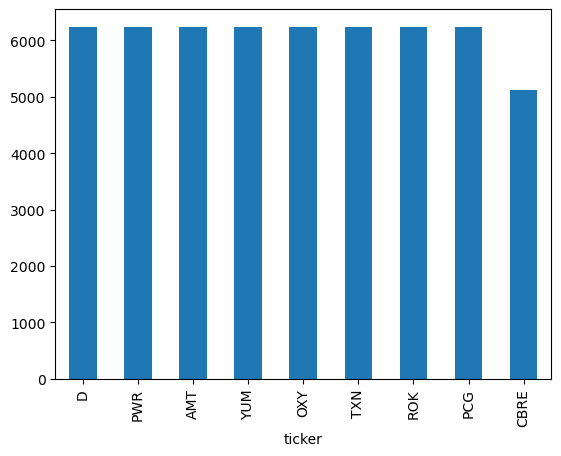

In [34]:
small_df['ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='ticker'>

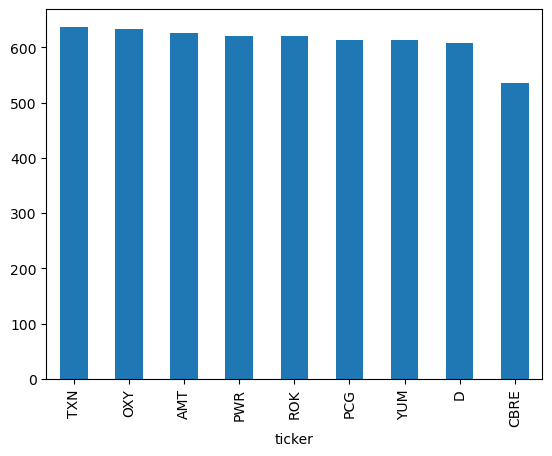

In [35]:
simple_sample_dt['ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

In [36]:
strat_sample_dt = small_df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt

Price,ticker,Date,Adj Close,Close,High,Low,Open,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
1654084,AMT,2021-10-22 00:00:00+00:00,260.269073,284.450012,285.309998,279.000000,279.779999,1496300,Real Estate,Telecom Tower REITs,2021,279.040009,0.019388,1,1.0
1649386,AMT,2003-02-26 00:00:00+00:00,3.588744,4.700000,4.740000,4.640000,4.720000,724500,Real Estate,Telecom Tower REITs,2003,4.710000,-0.002123,0,1.0
1650520,AMT,2007-08-28 00:00:00+00:00,29.504051,38.639999,39.180000,38.360001,39.099998,2183300,Real Estate,Telecom Tower REITs,2007,39.450001,-0.020532,0,1.0
1650315,AMT,2006-11-01 00:00:00+00:00,27.488247,36.000000,36.480000,35.660000,36.360001,1729100,Real Estate,Telecom Tower REITs,2006,36.020000,-0.000555,0,1.0
1654159,AMT,2022-02-09 00:00:00+00:00,229.782608,249.889999,250.460007,246.729996,248.149994,1824700,Real Estate,Telecom Tower REITs,2022,245.320007,0.018629,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727056,YUM,2020-10-02 00:00:00+00:00,88.411644,95.169998,95.309998,90.330002,90.620003,2173300,Consumer Discretionary,Restaurants,2020,91.820000,0.036484,1,0.0
1723063,YUM,2004-11-22 00:00:00+00:00,11.092888,15.970525,15.970525,15.686556,15.744069,2103748,Consumer Discretionary,Restaurants,2004,15.718907,0.016007,1,1.0
1726351,YUM,2017-12-13 00:00:00+00:00,72.738457,82.190002,82.739998,82.059998,82.180000,1640900,Consumer Discretionary,Restaurants,2017,81.989998,0.002439,1,0.0
1725704,YUM,2015-05-21 00:00:00+00:00,56.462749,67.174690,68.023003,66.959023,67.958305,4710343,Consumer Discretionary,Restaurants,2015,68.209923,-0.015177,0,0.0


<Axes: xlabel='ticker'>

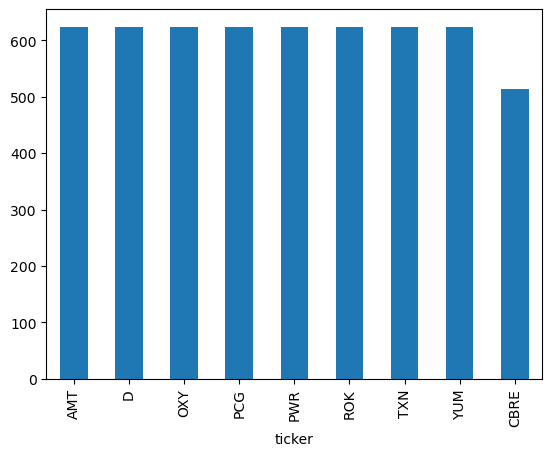

In [37]:
strat_sample_dt = small_df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\user\AppData\Local\Temp\ipykernel_16644\2932236319.py:4: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  .apply(lambda x: x.sample(frac = 0.1))


<Axes: xlabel='ticker'>

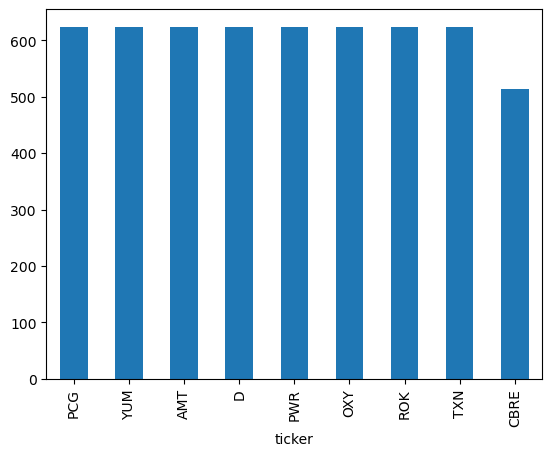

In [38]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['ticker'].isin(select_tickers)]['ticker'].value_counts().plot(kind='bar')

I added the next cell

In [39]:
import pandas as pd
import dask.dataframe as dd

# Sample pandas DataFrame
df = pd.DataFrame({'x': range(100), 'y': range(100, 200)})

# Convert pandas DataFrame to dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)

# Applying function with meta specified
result = ddf.apply(lambda x: x.sample(frac=0.1), axis=1, meta={'x': 'f8', 'y': 'f8'})
result.compute()


""
0
1
2
3
4
...
95
96
97
98
